<a href="https://colab.research.google.com/github/15nisha/EXperimets/blob/main/tsv_to_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
import re
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import sparse
from wordcloud import WordCloud
from sqlalchemy import create_engine # database connection
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [3]:
import pandas as pd


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
csv_table = pd.read_csv('/content/drive/MyDrive/Module3/data/dat/train.tsv',sep='\t')
csv_table.to_csv('new_name.csv',index=False)


In [6]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [6]:
# csv_table.to_csv('data.csv')
# !cp data.csv "drive/My Drive/"

In [7]:
csv_table.head()

,tags,description
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer is a midstream service...
1,2-4-years-experience-needed salary full-time-job,ICR Staffing is now accepting resumes for Indu...
2,part-time-job,This is a great position for the right person....
3,licence-needed,A large multi-specialty health center is expan...
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director is respon...


In [ ]:
len(csv_table)

4375

In [ ]:
csv_table['tags'][:9]

0    licence-needed supervising-job 5-plus-years-ex...
1     2-4-years-experience-needed salary full-time-job
2                                        part-time-job
3                                       licence-needed
4    5-plus-years-experience-needed full-time-job b...
5      associate-needed 5-plus-years-experience-needed
6    full-time-job ms-or-phd-needed 5-plus-years-ex...
7      bs-degree-needed 5-plus-years-experience-needed
8         bs-degree-needed 2-4-years-experience-needed
Name: tags, dtype: object

In [ ]:
csv_table.columns

Index(['tags', 'description'], dtype='object')

In [ ]:
csv_table['tags'].value_counts()

2-4-years-experience-needed                                                      214
licence-needed                                                                   165
full-time-job                                                                    137
hourly-wage                                                                      119
part-time-job                                                                    118
                                                                                ... 
licence-needed hourly-wage 5-plus-years-experience-needed                          1
full-time-job bs-degree-needed supervising-job 5-plus-years-experience-needed      1
hourly-wage 1-year-experience-needed full-time-job                                 1
full-time-job salary 2-4-years-experience-needed licence-needed                    1
5-plus-years-experience-needed supervising-job ms-or-phd-needed                    1
Name: tags, Length: 595, dtype: int64

In [27]:
uniq_table=csv_table.drop_duplicates(subset=['tags', 'description'], keep=False)

In [ ]:
len(csv_table)

4375

In [29]:
uniq_table.head()

,tags,description
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer is a midstream service...
1,2-4-years-experience-needed salary full-time-job,ICR Staffing is now accepting resumes for Indu...
2,part-time-job,This is a great position for the right person....
3,licence-needed,A large multi-specialty health center is expan...
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director is respon...


In [30]:
 uniq_table.dropna(inplace=True)

In [31]:
uniq_table.columns

Index(['tags', 'description'], dtype='object')

In [32]:
final_table = uniq_table

In [20]:
data_tags_count = uniq_table["tags"].apply(lambda x: len(x.split(" "))) #series.apply(func) invoke function on values of Series.
uniq_table['Tags_Count'] = data_tags_count
uniq_table.head()

,tags,Tags_Count
0,licence-needed supervising-job 5-plus-years-ex...,3
1,2-4-years-experience-needed salary full-time-job,3
2,part-time-job,1
3,licence-needed,1
4,5-plus-years-experience-needed full-time-job b...,4


In [21]:
uniq_table.head()

,tags,Tags_Count
0,licence-needed supervising-job 5-plus-years-ex...,3
1,2-4-years-experience-needed salary full-time-job,3
2,part-time-job,1
3,licence-needed,1
4,5-plus-years-experience-needed full-time-job b...,4


In [22]:
print("Maximum number of tags per question = "+str(max(uniq_table['Tags_Count'])))
print("Minimum number of tags per question = "+str(min(uniq_table['Tags_Count'])))
print("Avg number of tags per question = "+str(sum(uniq_table['Tags_Count'])/len(uniq_table['Tags_Count'])))

Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 1.9634703196347032


In [ ]:
uniq_table['Tags_Count'].value_counts()

2    1339
1    1275
3     663
4     197
5      30
Name: Tags_Count, dtype: int64

In [10]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "))
data_bow = vectorizer.fit_transform(uniq_table['tags'])

In [11]:
print("Total number of datapoints = {}".format(data_bow.shape[0]))
print("Total number of unique tags = {}".format(data_bow.shape[1]))

Total number of datapoints = 3504
Total number of unique tags = 12


In [13]:
print("Some of the tags in our data: {}".format(vectorizer.get_feature_names()[:15]))

Some of the tags in our data: ['1-year-experience-needed', '2-4-years-experience-needed', '5-plus-years-experience-needed', 'associate-needed', 'bs-degree-needed', 'full-time-job', 'hourly-wage', 'licence-needed', 'ms-or-phd-needed', 'part-time-job', 'salary', 'supervising-job']


In [ ]:
count_df[-10:]

,tags,Count
2,full-time-job,885
3,supervising-job,751
4,salary,669
5,5-plus-years-experience-needed,636
6,licence-needed,524
7,hourly-wage,451
8,1-year-experience-needed,331
9,part-time-job,328
10,associate-needed,209
11,ms-or-phd-needed,83


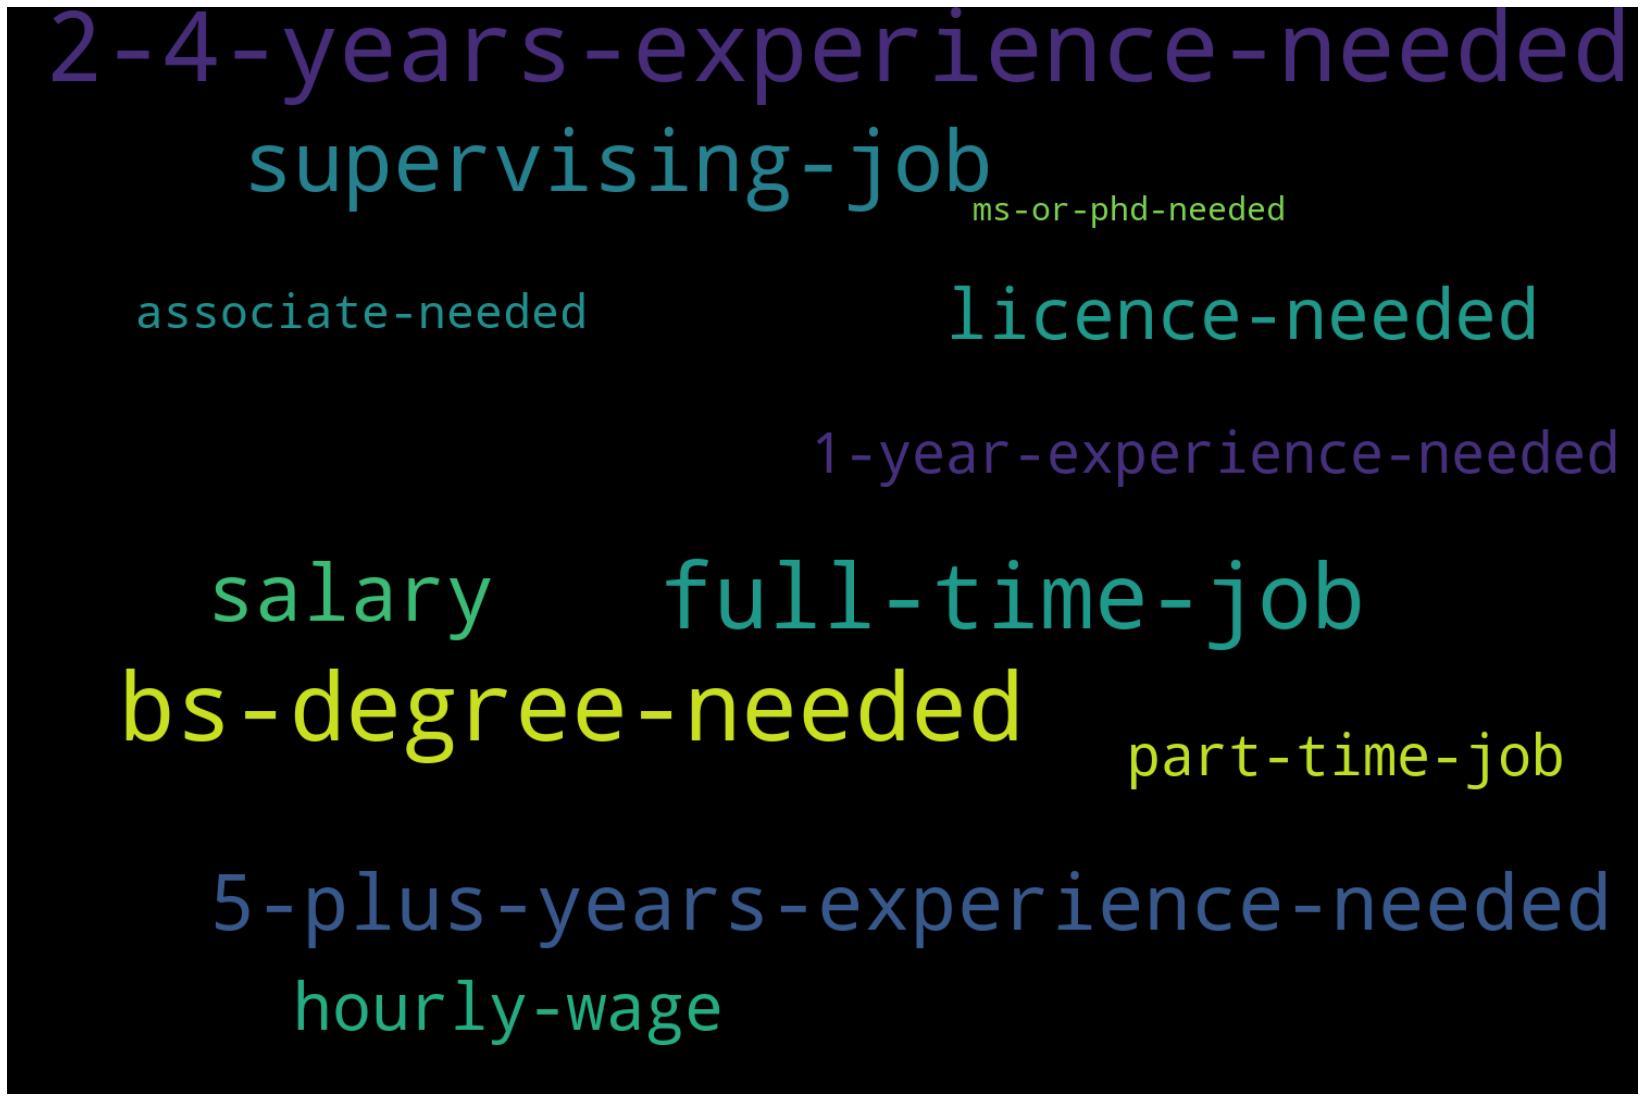

In [16]:
worcloudPlot = WordCloud(background_color="black", width=1500, height=1000)
worcloudPlot.generate_from_frequencies(frequencies=feat_count)
plt.figure(figsize=(30,20))
plt.imshow(worcloudPlot, interpolation="bilinear")
plt.axis("off")
plt.show()

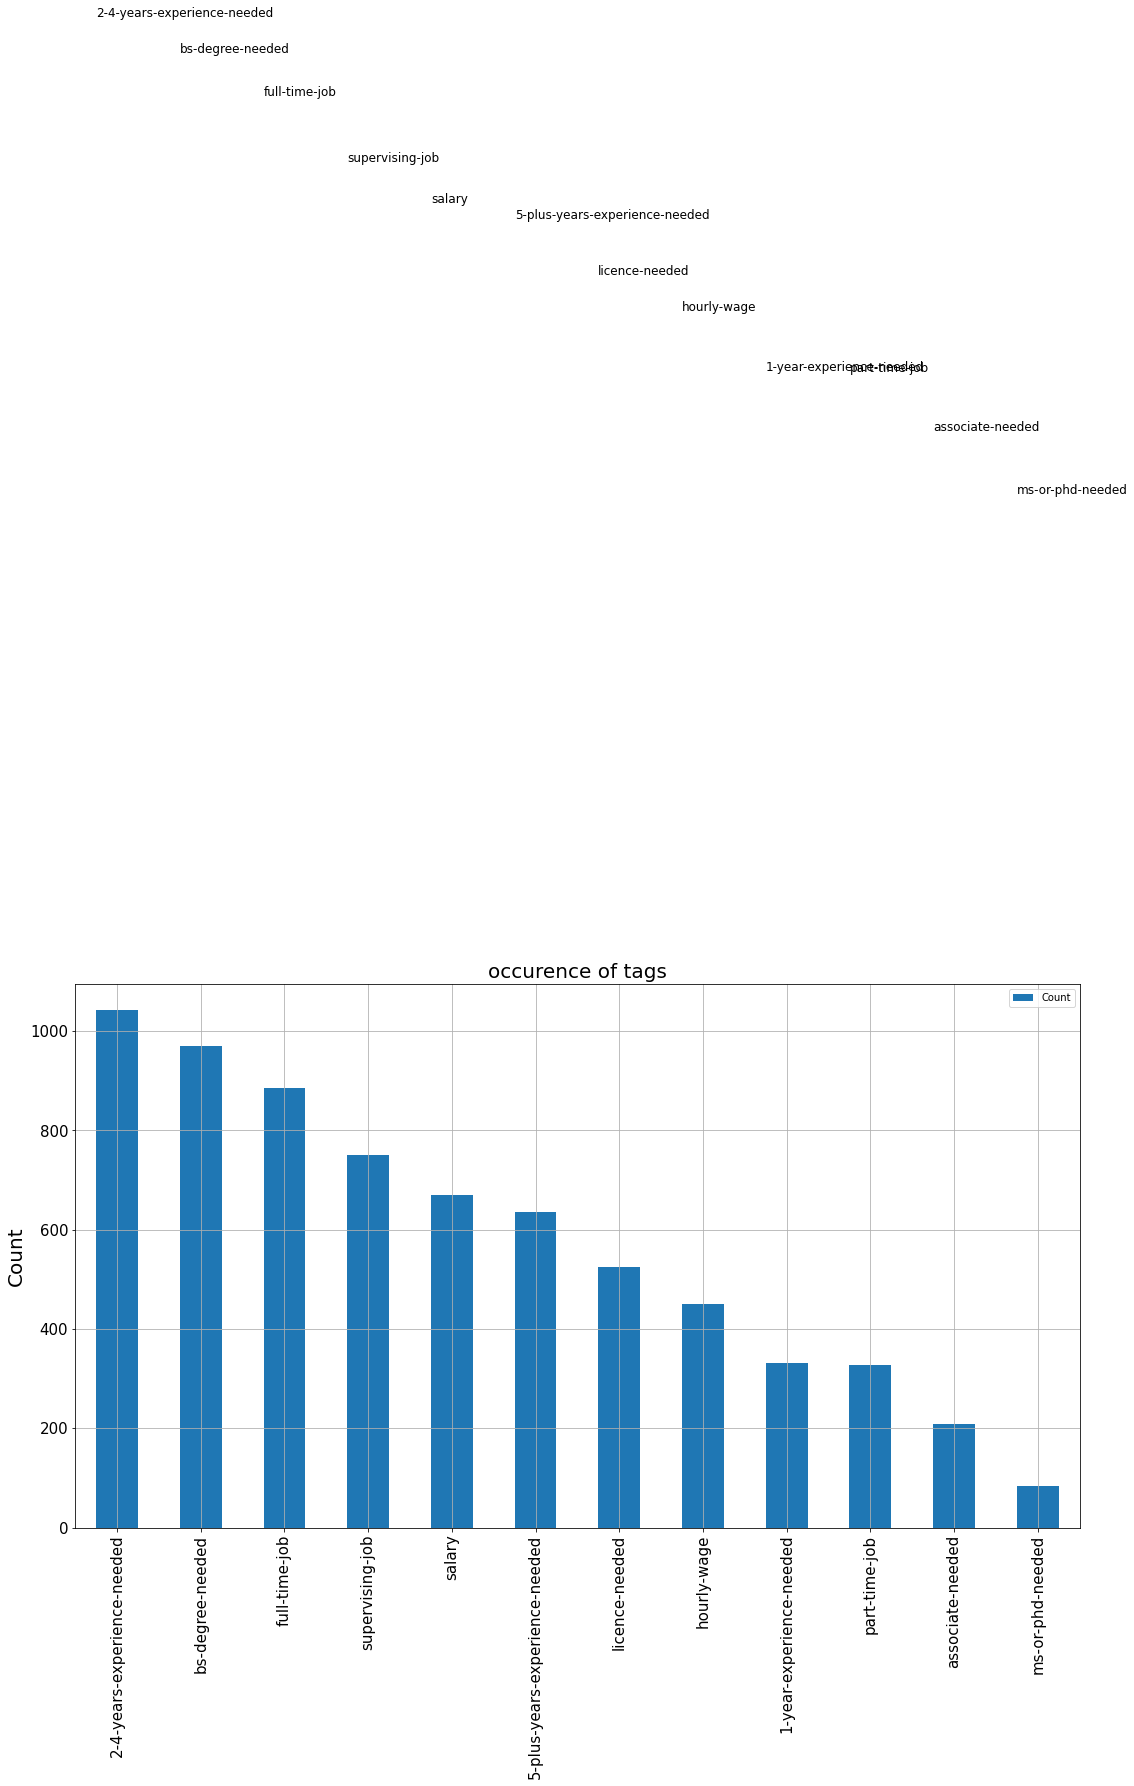

In [17]:
axes = count_df.head(20).plot(x = 'tags', y = 'Count', kind = 'bar', figsize = (18, 10), fontsize = 15, grid = True)
plt.xlabel("")
plt.ylabel("Count", fontsize = 20)
plt.title("occurence of tags", fontsize = 20)
cnt = 0
for i in axes.patches:
    axes.text(i.get_x(), i.get_height()+2000, count_df.head(20)['tags'][cnt], fontsize=12, color='black')
    cnt +=1

In [20]:
frequency_tags = list(feat_count_sorted.values())

In [21]:
frequency_tags

[1043, 970, 885, 751, 669, 636, 524, 451, 331, 328, 209, 83]

In [22]:
uniq_table.head()

,tags
0,licence-needed supervising-job 5-plus-years-ex...
1,2-4-years-experience-needed salary full-time-job
2,part-time-job
3,licence-needed
4,5-plus-years-experience-needed full-time-job b...


In [24]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [34]:
from nltk.stem.snowball import SnowballStemmer

In [35]:
stemmer = SnowballStemmer("english")

In [37]:
final_table.head()

,tags,description,stemmed_description
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer is a midstream service...,"[t, h, e, , c, o, m, p, a, n, y, , , , , ..."
1,2-4-years-experience-needed salary full-time-job,ICR Staffing is now accepting resumes for Indu...,"[i, c, r, , s, t, a, f, f, i, n, g, , i, s, ..."
2,part-time-job,This is a great position for the right person....,"[t, h, i, s, , i, s, , a, , g, r, e, a, t, ..."
3,licence-needed,A large multi-specialty health center is expan...,"[a, , l, a, r, g, e, , m, u, l, t, i, -, s, ..."
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director is respon...,"[j, o, b, , p, u, r, p, o, s, e, :, , , , ..."


In [39]:
final_table['stemmed_description'] = final_table['stemmed_description'].apply(lambda x: [stemmer.stem(y) for y in x])

In [44]:
final_table['description_lowercse']=final_table['description'].str.lower()

In [45]:
final_table.head()

,tags,description,stemmed_description,description_lowercse
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer is a midstream service...,"[t, h, e, , c, o, m, p, a, n, y, , , , , ...",the company employer is a midstream service...
1,2-4-years-experience-needed salary full-time-job,ICR Staffing is now accepting resumes for Indu...,"[i, c, r, , s, t, a, f, f, i, n, g, , i, s, ...",icr staffing is now accepting resumes for indu...
2,part-time-job,This is a great position for the right person....,"[t, h, i, s, , i, s, , a, , g, r, e, a, t, ...",this is a great position for the right person....
3,licence-needed,A large multi-specialty health center is expan...,"[a, , l, a, r, g, e, , m, u, l, t, i, -, s, ...",a large multi-specialty health center is expan...
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director is respon...,"[j, o, b, , p, u, r, p, o, s, e, :, , , , ...",job purpose: the account director is respon...


In [47]:
final_table['description_without_stopword'] = final_table['description_lowercse'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [48]:
final_table.head()

,tags,description,stemmed_description,description_lowercse,description_without_stopword
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer is a midstream service...,"[t, h, e, , c, o, m, p, a, n, y, , , , , ...",the company employer is a midstream service...,company employer midstream service provider on...
1,2-4-years-experience-needed salary full-time-job,ICR Staffing is now accepting resumes for Indu...,"[i, c, r, , s, t, a, f, f, i, n, g, , i, s, ...",icr staffing is now accepting resumes for indu...,icr staffing accepting resumes industrial main...
2,part-time-job,This is a great position for the right person....,"[t, h, i, s, , i, s, , a, , g, r, e, a, t, ...",this is a great position for the right person....,great position right person. healthcareseeker....
3,licence-needed,A large multi-specialty health center is expan...,"[a, , l, a, r, g, e, , m, u, l, t, i, -, s, ...",a large multi-specialty health center is expan...,large multi-specialty health center expanding ...
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director is respon...,"[j, o, b, , p, u, r, p, o, s, e, :, , , , ...",job purpose: the account director is respon...,job purpose: account director responsible mana...


In [49]:
final_table = final_table.drop(columns=['description','stemmed_description','description_lowercse'])

In [50]:
final_table.head()

,tags,description_without_stopword
0,licence-needed supervising-job 5-plus-years-ex...,company employer midstream service provider on...
1,2-4-years-experience-needed salary full-time-job,icr staffing accepting resumes industrial main...
2,part-time-job,great position right person. healthcareseeker....
3,licence-needed,large multi-specialty health center expanding ...
4,5-plus-years-experience-needed full-time-job b...,job purpose: account director responsible mana...


In [52]:

print("Total number of description = {}".format(final_table.shape[0]))

Total number of description = 3504


In [53]:
# vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "), binary = True)
# data_bow = vectorizer.fit_transform(final_table['tags'])

In [60]:
total_size=final_table.shape[0]
train_size=int(0.80*total_size)
x_train=final_table.head(train_size)
x_test=final_table.tail((total_size) - (train_size))
y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

NameError: ignored

In [ ]:
len(uniq_table)

3504

In [ ]:
uniq_table.groupby(['tags']).count()

,description
tags,
1-year-experience-needed,76
1-year-experience-needed associate-needed,2
1-year-experience-needed associate-needed part-time-job,1
1-year-experience-needed bs-degree-needed,26
1-year-experience-needed bs-degree-needed full-time-job,2
...,...
supervising-job salary bs-degree-needed,1
supervising-job salary bs-degree-needed 5-plus-years-experience-needed full-time-job,1
supervising-job salary full-time-job,2


In [ ]:
df = uniq_table.groupby(['tags']).count().sort_values(['description'],ascending=False) 
                             

In [ ]:
df.head(10)

,description
tags,
2-4-years-experience-needed,214
licence-needed,165
full-time-job,137
hourly-wage,119
part-time-job,118
bs-degree-needed,110
salary,98
5-plus-years-experience-needed,97
supervising-job,91


In [ ]:
df = df[df['description']>=5]

In [ ]:
df.head(30)

In [ ]:
from matplotlib import pyplot as plt


Text(0, 0.5, 'ylabel')

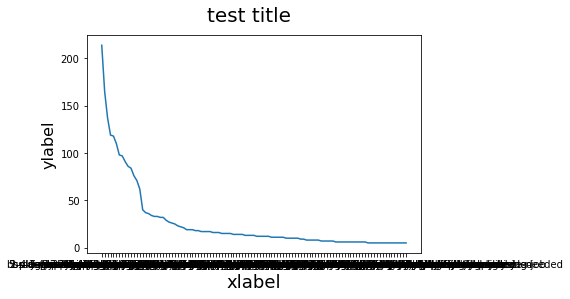

In [ ]:
fig = plt.figure()
plt.plot(df)
fig.suptitle('test title', fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
# fig.savefig('test.jpg')

In [ ]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "))

In [ ]:
uniq_table.columns

Index(['tags', 'description'], dtype='object')

In [ ]:
uniq_table.isna().

tags           4375
description    4375
dtype: int64

In [ ]:
data_bow = vectorizer.fit_transform(uniq_table['tags'])

In [ ]:
print("Total number of datapoints = {}".format(data_bow.shape[0]))
print("Total number of unique tags = {}".format(data_bow.shape[1]))

Total number of datapoints = 3504
Total number of unique tags = 12
